# Introduction

This notebook was inspired by a short educational film, "Random Events." It may be viewed at the Internet Archive [here.](https://archive.org/details/RandomEvents) The intention is to attempt to demonstrate that the overall effect of a large number of random events can be very predictable.

# Histograms

Supposing we were to generate a plot of a randomized normal distribution of numbers with the following parameters:

- mean ($\mu$) = 0,
- standard deviation ($\sigma$) = 1,
- sample size = 100.

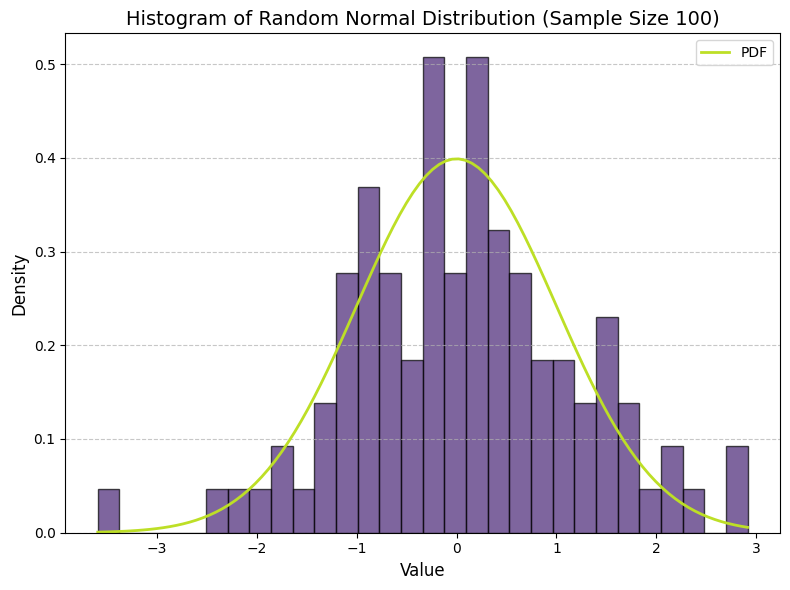

In [276]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate random data from a normal distribution,.
mean = 0  # Mean of the distribution.
std_dev = 1  # Standard deviation of the distribution.
sample_size = 100  # Number of random samples.

data = np.random.normal(loc=mean, scale=std_dev, size=sample_size)

# Plot the histogram.
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, color=plt.cm.viridis(0.1), edgecolor='black', alpha=0.7, density=True)

# Add labels, title, and grid.
plt.title("Histogram of Random Normal Distribution (Sample Size 100)", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Overlay the probability density function (PDF).
x = np.linspace(min(data), max(data), 100)
pdf = norm.pdf(x, loc=mean, scale=std_dev)
plt.plot(x, pdf, color=plt.cm.viridis(0.9), label='PDF', linewidth=2)

# Add legend.
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


The curved line shows the probability density function (PDF), "a mathematical function that describes the likelihood of a random variable taking a particular value within a continuous range."$^1$ The curve is bell shaped and symmetric, peaking at the mean of the distribution. Each time that we generate the plot, the distribution of the numbers will be different, as the numbers are chosen at random. We can see the fluctuations between them by generating 10 random normal distributions and overlaying them.

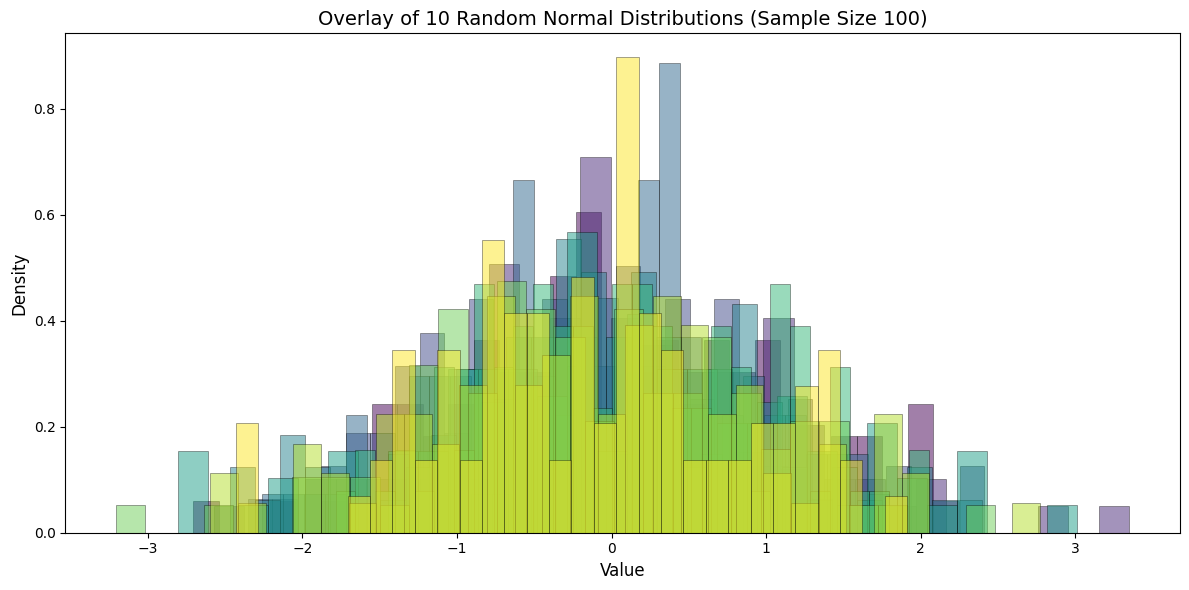

In [277]:
# Set the parameters for the normal distributions.
num_distributions = 10
mean = 0
std_dev = 1
num_points = 100

# Create a figure.
plt.figure(figsize=(12, 6))

# Generate colors using the viridis palette.
viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_distributions))

# Generate and plot each random normal distribution.
for i in range(num_distributions):
    data = np.random.normal(mean, std_dev, num_points)
    plt.hist(
        data,
        bins=30,
        density=True,  # Normalize the histogram.
        alpha=0.5,     # Set transparency.
        edgecolor='black',  # Black edges.
        linewidth=0.5,  # Thin edges.
        color=viridis_colors[i]  # Use a color from the viridis palette.
    )

# Add labels and title.
plt.title("Overlay of 10 Random Normal Distributions (Sample Size 100)", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.tight_layout()
plt.show()


The fluctuations in the histogram bars are clearly visible, a result of the randomness in each sample of the distributions. If the sample size for each distribution were increased, the fluctuations would smooth out and the histograms would converge more closely to the theoretical, bell-shaped curve of the normal distribution. We can see this more clearly by increasing the sample size to 10000.

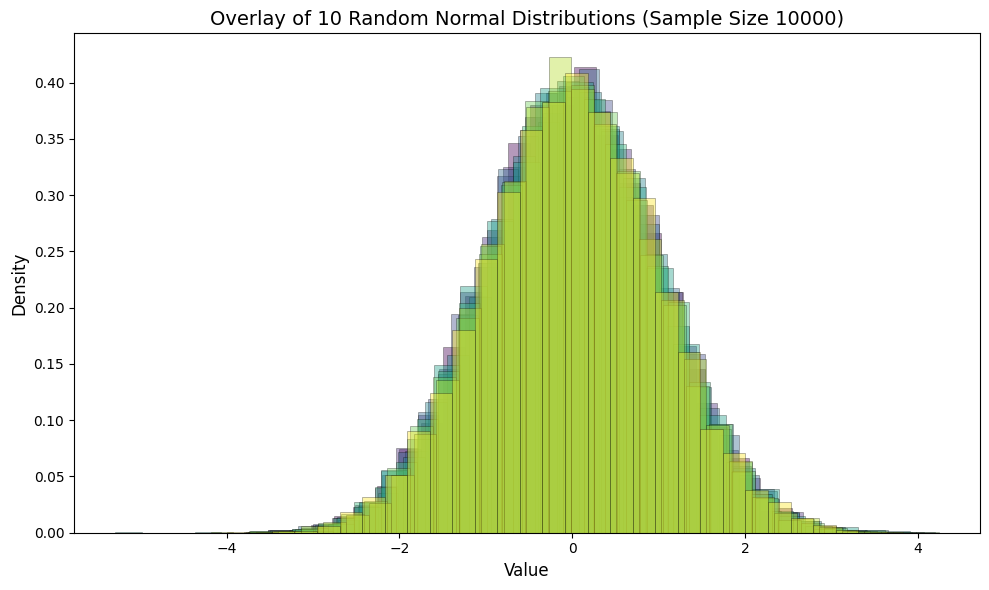

In [278]:
# Set the parameters for the normal distributions
num_distributions = 10
mean = 0
std_dev = 1
num_points = 10000

# Create a figure
plt.figure(figsize=(12, 6))

# Generate and plot each random normal distribution using the viridis color palette
viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_distributions))  # Generate colors

for i in range(num_distributions):
    data = np.random.normal(mean, std_dev, num_points)
    plt.hist(
        data,
        bins=30,
        density=True,  # Normalize the histogram
        alpha=0.4,     # Set transparency
        edgecolor='black',  # Black edges
        linewidth=0.5,  # Thin edges
        color=viridis_colors[i]  # Use a color from the viridis palette
    )

# Add labels and title
plt.title("Overlay of 10 Random Normal Distributions (Sample Size 10000)", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

The second plot with an increased sample size reduces the variability of the histogram, making it appear more closely aligned with the true normal distribution. The first plot's approximation is much more rough, with irregularities in the bar heights due to sampling variability. With the larger sample size in the second plot, the histogram provides a much closer approximation to the true probability density function (PDF) of the normal distribution. Why is this the case?

A number of factors are at play here. One factor is the Law of Large Numbers, which states that "as the sample size increases, the sample's mean (or any other statistic) converges toward the population's true mean."$^1$ This, in effect, means that larger samples reduce the effect of random fluctuations. Another factor is the reduced sampling variability; "The larger the sample size, the less variability we expect in the observed frequencies of each bin in the histogram."$^1$ Finally, the Central Limit Theorem states that "when you draw repeated random samples and calculate their means, the sampling distribution of the means will tend to form a normal distribution, regardless of the original population's distribution, as the sample size increases."$^1$ All of these factors combine to produce predictable behaviour out of randomness.

# Squares

This can be illustrated another way with a grid of squares. There are 16 squares in the grid. Each is either black or white and the colours of the individual squares are chosen entirely at random.

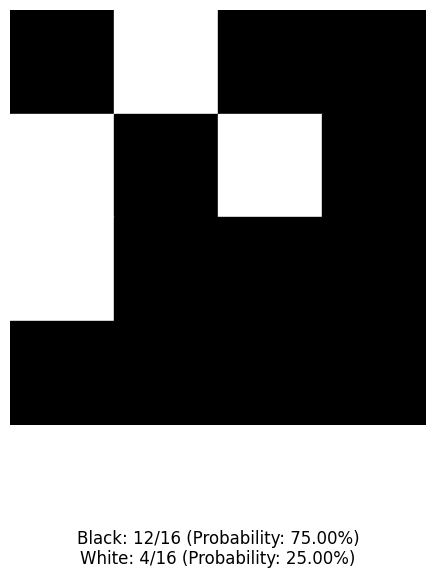

In [279]:
# Set up the grid size.
grid_size = 4

# Generate random colors for the grid (0 for white, 1 for black).
colors = np.random.choice([0, 1], size=(grid_size, grid_size))

# Count the number of black and white squares.
black_count = np.sum(colors)
total_squares = grid_size ** 2
white_count = total_squares - black_count

# Calculate probabilities.
prob_black = black_count / total_squares
prob_white = white_count / total_squares

# Create the figure and axis.
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through the grid and plot each square.
for i in range(grid_size):
    for j in range(grid_size):
        color = 'black' if colors[i, j] == 1 else 'white'
        rect = plt.Rectangle((j, grid_size - 1 - i), 1, 1, color=color)
        ax.add_patch(rect)

# Set limits and aspect ratio.
ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_aspect('equal')
ax.axis('off')  # Turn off the axes.

# Display the count of black squares and probabilities below the grid.
plt.text(
    grid_size / 2, -1,  # Position: centered below the grid.
    f"Black: {black_count}/{total_squares} (Probability: {prob_black:.2%})\nWhite: {white_count}/{total_squares} (Probability: {prob_white:.2%})",
    fontsize=12,
    ha="center",
    va="top",
    color="black"
)

plt.tight_layout()
plt.show()


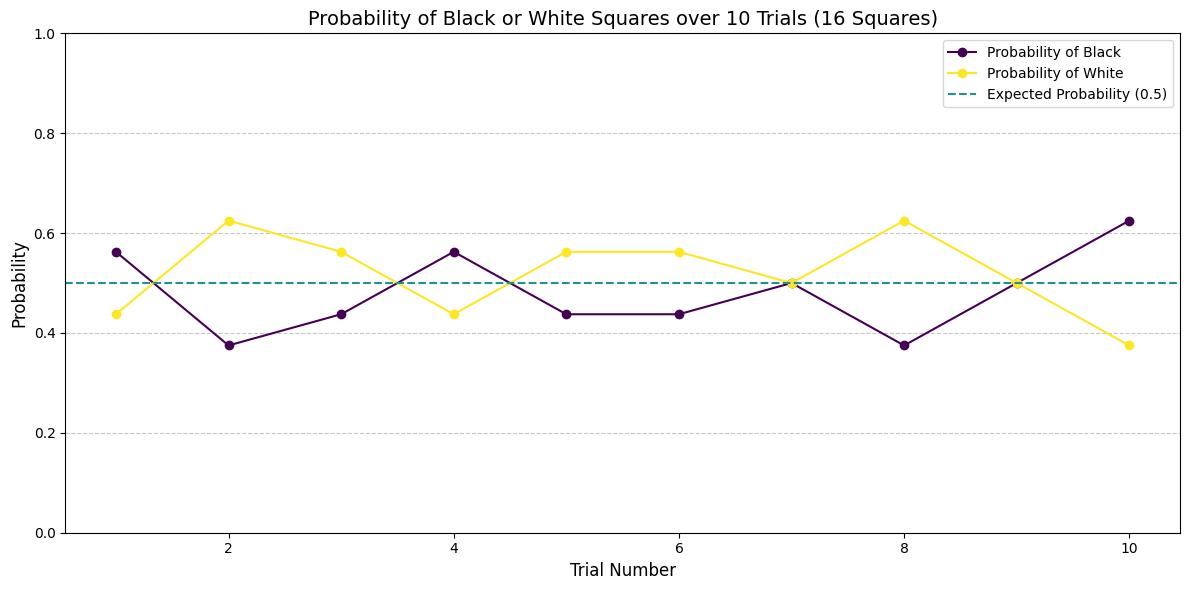

In [280]:
# Number of trials
num_trials = 10
grid_size = 4
total_squares = grid_size ** 2

# Initialize lists to store probabilities
prob_black_list = []
prob_white_list = []

# Perform trials and calculate probabilities
for _ in range(num_trials):
    colors = np.random.choice([0, 1], size=(grid_size, grid_size))
    black_count = np.sum(colors)
    prob_black = black_count / total_squares
    prob_white = 1 - prob_black  # Complement of prob_black
    prob_black_list.append(prob_black)
    prob_white_list.append(prob_white)

# Define the Viridis color palette
viridis = plt.cm.viridis(np.linspace(0, 1, 3))

# Plot the probabilities
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_trials + 1), prob_black_list, marker="o", label="Probability of Black", color=viridis[0])
plt.plot(range(1, num_trials + 1), prob_white_list, marker="o", label="Probability of White", color=viridis[2])
plt.axhline(y=0.5, color=viridis[1], linestyle="--", label="Expected Probability (0.5)")  # Expected probability
plt.title("Probability of Black or White Squares over 10 Trials (16 Squares)", fontsize=14)
plt.xlabel("Trial Number", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.ylim(0, 1)  # Set limits for probabilities
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

One might expect, each time that the plot is generated, that half the squares would be black and half would be white. Their probabilities of being black or white in such an arrangement would be 50% respectively. However, on generating the plot multiple times, one will see considerable fluctuation in the number of black and white squares, as well as in their probabilities for a given configuration.

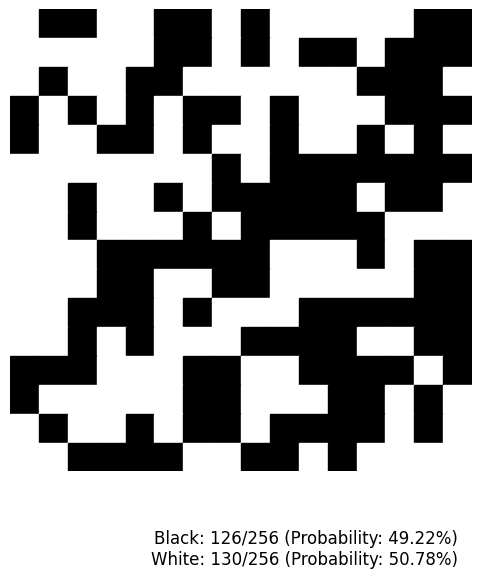

In [281]:
# Set up the grid size.
grid_size = 16

# Generate random colors for the grid (0 for white, 1 for black).
colors = np.random.choice([0, 1], size=(grid_size, grid_size))

# Count the number of black squares.
black_count = np.sum(colors)
total_squares = grid_size ** 2
white_count = total_squares - black_count

# Calculate probabilities.
prob_black = black_count / total_squares
prob_white = white_count / total_squares

# Create the figure and axis.
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through the grid and plot each square.
for i in range(grid_size):
    for j in range(grid_size):
        color = 'black' if colors[i, j] == 1 else 'white'
        rect = plt.Rectangle((j, grid_size - 1 - i), 1, 1, color=color)
        ax.add_patch(rect)

# Set limits and aspect ratio.
ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_aspect('equal')
ax.axis('off')  # Turn off the axes.

# Display the count of black squares and probabilities outside the grid.
ax.text(
    grid_size - 0.5, -2,  # Position: below the grid to avoid overlap.
    f"Black: {black_count}/{total_squares} (Probability: {prob_black:.2%})\nWhite: {white_count}/{total_squares} (Probability: {prob_white:.2%})",
    fontsize=12,
    ha="right",
    va="top",
    color="black"
)

plt.show()


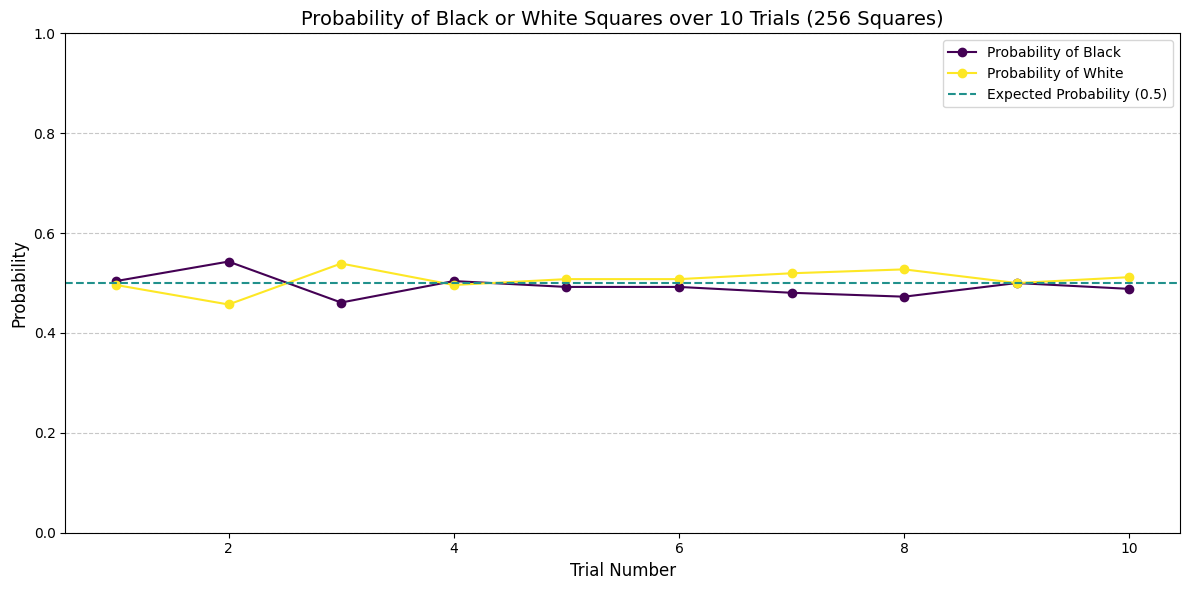

In [282]:
# Number of trials.
num_trials = 10
grid_size = 16
total_squares = grid_size ** 2

# Initialize lists to store probabilities.
prob_black_list = []
prob_white_list = []

# Perform trials and calculate probabilities.
for _ in range(num_trials):
    colors = np.random.choice([0, 1], size=(grid_size, grid_size))
    black_count = np.sum(colors)
    prob_black = black_count / total_squares
    prob_white = 1 - prob_black  # Complement of prob_black.
    prob_black_list.append(prob_black)
    prob_white_list.append(prob_white)

# Define the Viridis color palette.
viridis = plt.cm.viridis(np.linspace(0, 1, 3))

# Plot the probabilities.
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_trials + 1), prob_black_list, marker="o", label="Probability of Black", color=viridis[0])
plt.plot(range(1, num_trials + 1), prob_white_list, marker="o", label="Probability of White", color=viridis[2])
plt.axhline(y=0.5, color=viridis[1], linestyle="--", label="Expected Probability (0.5)")  # Expected probability
plt.title("Probability of Black or White Squares over 10 Trials (256 Squares)", fontsize=14)
plt.xlabel("Trial Number", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.ylim(0, 1)  # Set limits for probabilities.
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


This time there are a total of 256 squares in the grid. The probabilities that the squares will be either black or white are both much closer to 50%, no matter how many times the plot is generated. This aligns with the expected equal likelihood for each square, due to the larger sample size. The first grid of 16 squares also showed more variability in probabilities, precisely because smaller sample sizes result in more random fluctuations. The second plot shows probabilities that converge closer to 50% due to the fact that a larger grid size (i.e. larger sample of 256 squares) reduces variability. This is an expected result of the Law of Large Numbers. In short, the larger grid in the second plot demonstrates predictable behaviour, emerging from randomness with increased sample size.$^1$

# Radioactive Decay

Radioactive decay is a chaotic and random process. It is impossible to predict when the decay of any indivual atom of a substance can occur. Yet even in this case, with a large number of atoms, predictable behaviour emerges. Let us consider the exponential radioactive decay of two substances, helium and uranium-238.

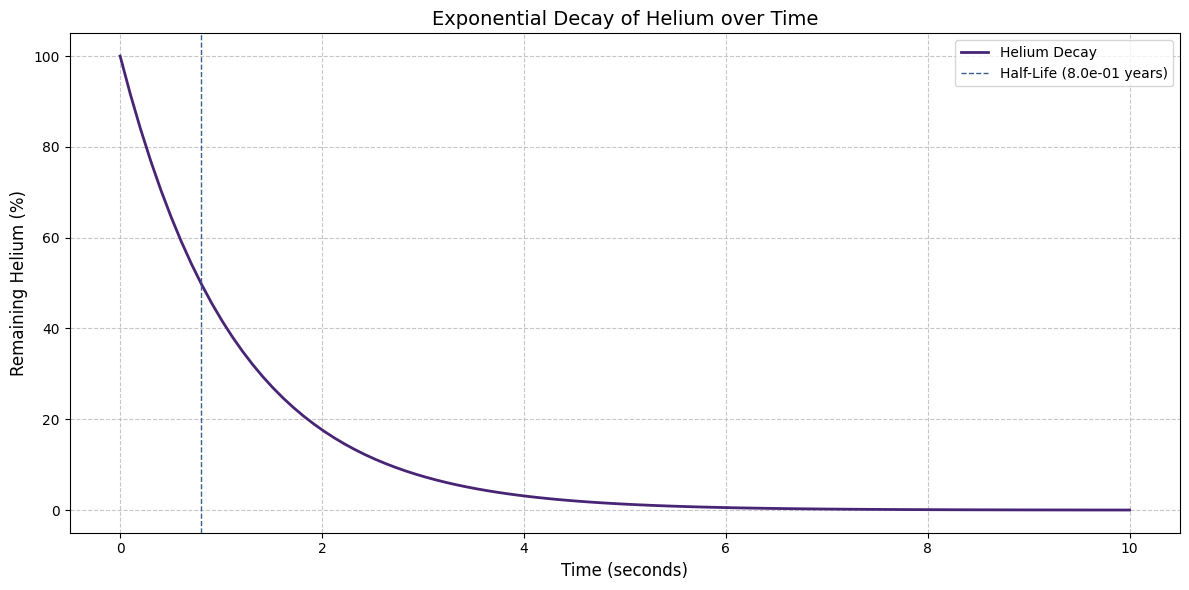

In [283]:
# Half-life of helium (in seconds, adjust this value as needed).
half_life = 0.8

# Time range (0 to 10 seconds).
time = np.linspace(0, 10, 100)

# Initial quantity of helium.
initial_quantity = 100

# Calculate the remaining helium using the exponential decay formula.
remaining_helium = initial_quantity * np.exp(-np.log(2) * time / half_life)

# Plot the decay.
plt.figure(figsize=(12, 6))
plt.plot(time, remaining_helium, color=plt.cm.viridis(0.1), linewidth=2, label="Helium Decay")

# Add labels, title, and legend.
plt.title("Exponential Decay of Helium over Time", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Remaining Helium (%)", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Add annotation for half-life.
plt.axvline(x=half_life, color=plt.cm.viridis(0.3), linestyle="--", linewidth=1, label=f"Half-Life ({half_life:.1e} years)")
plt.legend(fontsize=10)
           
plt.tight_layout()
plt.show()


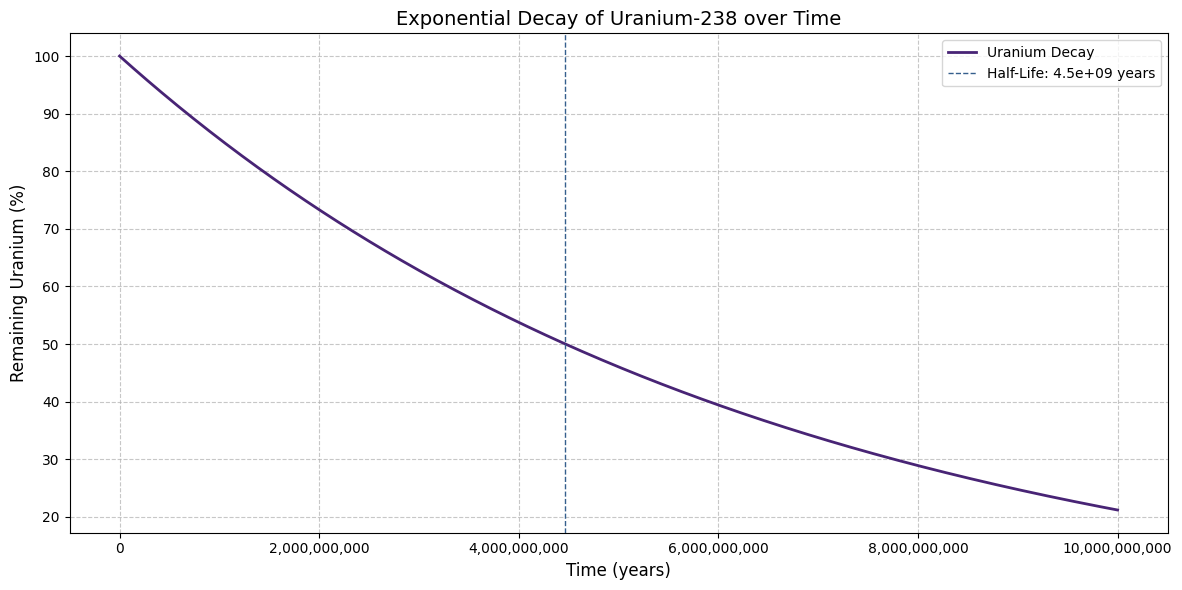

In [284]:
# Half-life of uranium-238 (in years).
half_life_uranium = 4.468e9  # 4.468 billion years.

# Time range (0 to 10 billion years).
time = np.linspace(0, 10e9, 500)  # 500 points over 10 billion years.

# Initial quantity of uranium (arbitrary units).
initial_quantity = 100

# Calculate the remaining uranium using the exponential decay formula.
remaining_uranium = initial_quantity * np.exp(-np.log(2) * time / half_life_uranium)

# Plot the decay.
plt.figure(figsize=(12, 6))
plt.plot(time, remaining_uranium, color=plt.cm.viridis(0.1), linewidth=2, label="Uranium Decay")

# Add a vertical line for the half-life.
plt.axvline(
    x=half_life_uranium,
    color=plt.cm.viridis(0.3),
    linestyle="--",
    linewidth=1,
    label=f"Half-Life: {half_life_uranium:.1e} years"
)

# Format the x-axis labels to display years without scientific notation.
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

# Add labels, title, and legend.
plt.title("Exponential Decay of Uranium-238 over Time", fontsize=14)
plt.xlabel("Time (years)", fontsize=12)
plt.ylabel("Remaining Uranium (%)", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


The first plot represents the exponential decay of helium over a short time scale, as its half-life is very short. The initial amount of helium decreases as time progresses, until a point (marked by the dashed line) at which half of the original helium remains. This is the half-life of helium. The second plot shows the exponential radioactive decay of uranium-238, which has a half-life of over 4 billion years. Both plots demonstrate a predictable, smooth curve. How can this be, when the decay of individual atoms are entirely random events? It is impossible to predict when a specific atom will decay, but when observing a large number of atoms, the randomness averages out and the decay follows the exponential decay law. The predictability of decay is evident regardless of the time scale or the substance being observed. This illustrates a universal principle in physics, where large-scale order arises from small-scale randomness. The seemingly chaotic process of radioactive decay becomes predictable when viewed at a macroscopic level.$^1$ 

# Dice Game

We can demonstrate this feature of exponential decay in another manner altogether, using a "game" with 100 dice. Each time we roll the dice, we look for dice that have rolled a five; these we will consider "atoms" that have just decayed. We will remove them from the set and then roll the dice again, removing the fives on each successive roll. What will the curve look like in this instance?

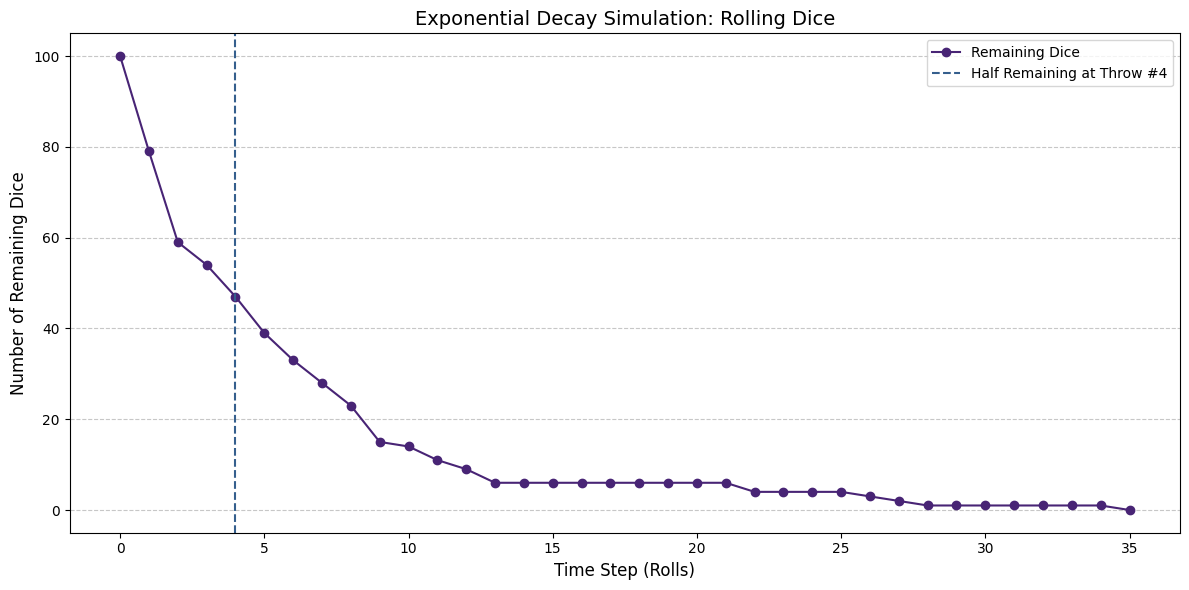

In [285]:
# Number of dice.
num_dice = 100

# Initialize list to store the number of remaining dice at each step.
remaining_dice = [num_dice]

# Simulate rolling dice and removing those that roll a five.
while remaining_dice[-1] > 0:
    # Roll the dice.
    rolls = np.random.randint(1, 7, size=remaining_dice[-1])  # Rolls between 1 and 6.
    # Count the remaining dice (not a five).
    remaining = np.sum(rolls != 5)
    # Append the count of remaining dice.
    remaining_dice.append(remaining)

# Generate time steps.
time_steps = np.arange(len(remaining_dice))

# Find the step where half of the dice remain.
half_dice = num_dice / 2
half_dice_step = next((i for i, x in enumerate(remaining_dice) if x <= half_dice), None)

# Plot the exponential decay.
plt.figure(figsize=(12, 6))
plt.plot(time_steps, remaining_dice, marker="o", linestyle="-", color=plt.cm.viridis(0.1), label="Remaining Dice")

# Add vertical dashed line where half of the dice remain.
if half_dice_step is not None:
    plt.axvline(x=half_dice_step, color=plt.cm.viridis(0.3), linestyle="--", label=f"Half Remaining at Throw #{half_dice_step}")

# Add labels, title, and legend.
plt.title("Exponential Decay Simulation: Rolling Dice", fontsize=14)
plt.xlabel("Time Step (Rolls)", fontsize=12)
plt.ylabel("Number of Remaining Dice", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()

plt.show()


The curve follows the same pattern as those of radioactive decay seen earlier. This is due to the fact that exponential decay is experienced in both cases. The plots demonstrating radioactive decay of substances follow the same pattern as the "decay" experienced by the dice upon each random roll. In the case of the radioactive decay plots, atoms of a radioactive isotope decay into a more stable form at a fixed probability over time; the quantity of the substance decreases proportionally to its current amount. In the dice simulation, each die has a fixed probability (1/6) of being removed from the set if it rolls a 5. The number of remaining dice decreases proportionally to its current number after every roll. This, once again, shows predictable behaviour emerging from randomness. The roll of a die is equally likely to land upon 5 as any other value. Similarly, the decay of an atom is probabilistic; there is no way to predict when a specific atom will decay. The Law of Large Numbers also assures that when you aggregate many random events, as has been done here, the overall outcome converges to a predictable pattern. In the case of the dice simulation, rolling many dice ensures that about 1/6 of them will roll a 5 each time. In radioactive decay, a similarly constant proportion of atoms decays over each time interval. This proportional decrease occurs in both cases over time due to the fact that each atom or die behaves independently, but with the same probability of removal or decay. This is why the curves for radioactive decay and for the dice game look nearly identical, despite the underlying mechanisms being entirely different. The concept of half-life also helps to establish how randomness becomes predictable; after a specific number of rolls or a specific time period, either half of the dice or atoms remain respectively, regardless of their initial number. This arises because the process depends upon fixed probabilities. Exponential decay, as demonstrated here, is a statistical phenomenon observed in widely diverse systems, from dice games to radioactive decay of substances.$^1$

# Conclusion

To quote the short film that inspired this notebook:

"Random events are events which occur with no order - that is, unpredictably - and yet the overall effect of a very large number of such events can be very predictable indeed."<sup>2</sup>

# References

$^1$ - OpenAI. (2025). ChatGPT (January 24 version) [Large language model]. https://chat.openai.com/chat

$^2$ - Author Friedman, J. (2015, January 20). Random Events. Internet Archive. https://archive.org/details/RandomEvents